# Классификация

Scikit-learn: http://scikit-learn.org/stable/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # отключаем предупреждения Anaconda

Данные http://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [2]:
# считываем данные из файла 'crx.data.txt' с разделителем ',' и обозначением пропущенных значений '?'
crx_data = pd.read_csv('crx.data.txt', sep=',', header=None, na_values='?')

# назовем признаки так, как это указано в описании данных
crx_data.columns = ['A'+str(i+1) for i in range(crx_data.shape[1])]
crx_data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [3]:
print(crx_data.shape) # размерность данных - 690 записей и 16 переменных
print(crx_data.dtypes) # типы переменных

(690, 16)
A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object


In [4]:
# чтобы в дальнейшем не возникло проблем, преобразуем целочисленные переменные в действительные
# (в описании данных указано, что A11 и A15 непрерывные, т.е. не категориальные, поэтому можем так сделать)
crx_data[['A11', 'A15']] = crx_data[['A11', 'A15']].astype(float)
crx_data[['A11', 'A15']].dtypes

A11    float64
A15    float64
dtype: object

In [5]:
# подсчитаем число пропущенных значений по каждому признаку
crx_data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [6]:
# в этом курсе не рассматриваем варианты того, как можно бороться с пропусками в данных,
# поэтому просто удалим строки с пропущенными значениями
crx_data.dropna(inplace=True)
# и проверим, сколько записей осталось
crx_data.shape # осталось 653 записи

(653, 16)

In [7]:
crx_data.describe() # стандартные характеристики числовых переменных
# Обратим внимание, что принимают значения в разных пределах
# Например, A3 от 0 до 28, а A14 от 0 до 2000

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [8]:
X = crx_data.iloc[:, :-1]

y = crx_data.iloc[:, -1] # выделим целевую переменную (класс)


# Преобразуем категориальные признаки (OneHotEnconding)
# Каждому признаку с k уникальными значениями ставится в соответствие k-1 бинарный признак
X = pd.get_dummies(X, prefix=[column for column in X.columns if X[column].dtype == object], drop_first=True)
X.head()

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,1.25,1.0,202.0,0.0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,3.04,6.0,43.0,560.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,1.50,0.0,280.0,824.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,3.75,5.0,100.0,3.0,1,1,0,0,...,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,1.71,0.0,120.0,0.0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [9]:
y.value_counts(normalize=True) # проверим частоту классов

-    0.546708
+    0.453292
Name: A16, dtype: float64

In [10]:
# Разделим на обучающую (70%) и тестовую выборки (30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

# в каждой выборке проверим частоту классов
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

-    0.557987
+    0.442013
Name: A16, dtype: float64
-    0.520408
+    0.479592
Name: A16, dtype: float64


## Логистическая регрессия

In [11]:
# В sklearn для логистической регрессии также есть метод LogisticRegression, но он не позволяет обучать модель без регуляризации
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score

# задаем параметры для обучения модели
log_clf = SGDClassifier(loss='log', penalty='none', alpha=0.1, max_iter=10**4, 
                        n_jobs=4, random_state=0, learning_rate='optimal')
# Обучаем модель на обучающей выборке
log_clf.fit(X_train, y_train)

print('Свободный параметр: {}'.format(log_clf.intercept_[0]))
print('Параметры: ')
print(log_clf.coef_)
print('\nЧисло итераций: {}\n'.format(log_clf.n_iter_))
print('Функция потерь на обучающей выборке: {:.4f}'.format(log_loss(y_train, log_clf.predict_proba(X_train))))
print('Функция потерь на тестовой выборке: {:.4f}\n'.format(log_loss(y_test, log_clf.predict_proba(X_test))))
print('Accuracy на обучающей выборке: {:.4f}'.format(accuracy_score(y_train, log_clf.predict(X_train))))
print('Accuracy на тестовой выборке: {:.4f}'.format(accuracy_score(y_test, log_clf.predict(X_test))))

Свободный параметр: 2.7702304805
Параметры: 
[[  1.03590667e+00   4.99835440e-01  -1.15555194e+01  -1.89478778e+01
    3.23371386e-02  -1.33749706e-03   1.21075857e-01   2.28806221e-01
    2.65499531e+00  -1.13571049e-01   2.65499531e+00   2.51462023e+00
   -1.02867828e+00  -3.95780545e-01  -8.13476431e-01   2.73266532e+00
    2.52925475e+00   1.30947593e-01   6.44500876e-01  -8.91434432e-01
   -1.32518980e-01   1.00405425e-03  -8.93867942e-01  -5.97193309e-01
    2.92883569e-02   2.61939828e+00  -2.72949631e+00  -3.48111061e-01
    2.48673365e-01   9.89903573e-02   4.18211956e-01  -1.37955426e-01
   -1.23004345e+01  -1.56714581e+00   2.51861501e+00   0.00000000e+00
   -6.00750479e-01]]

Число итераций: 10000

Функция потерь на обучающей выборке: 4.4613
Функция потерь на тестовой выборке: 5.2603

Accuracy на обучающей выборке: 0.7987
Accuracy на тестовой выборке: 0.7653


In [12]:
# стандартизируем данные, чтобы по значению коэффициента переменной можно было судить о величине ее вклада в классификацию
from sklearn.preprocessing import StandardScaler # вычитает среднее и делит на стандартное отклонение

scaler_train = StandardScaler().fit(X_train) # оценим параметры стандартизации по обучающей выборке
X_train_sc = scaler_train.transform(X_train) # стандартизируем обучающую выборку
X_test_sc = scaler_train.transform(X_test) # стандартизируем тестовую выборку

scaler = StandardScaler().fit(X) # оценим параметры по всей выборке
X_sc = scaler.transform(X) # и стандартизируем ее

In [13]:
X_train_sc.mean(axis=0)

array([ -1.88519271e-16,   3.10959622e-17,   3.10959622e-17,
        -1.94349764e-17,  -1.04948872e-16,  -9.23161377e-18,
        -9.32878865e-17,  -2.33219716e-17,  -3.88699527e-18,
         3.88699527e-17,  -3.88699527e-18,  -9.32878865e-17,
        -1.16609858e-17,  -3.88699527e-18,   2.52654693e-17,
        -6.41354220e-17,  -5.24744362e-17,   1.94349764e-17,
        -2.72089669e-17,  -5.05309385e-17,  -4.66439433e-17,
         1.36044835e-17,   2.33219716e-17,   3.88699527e-18,
        -4.27569480e-17,  -2.72089669e-17,   1.43818825e-16,
        -3.10959622e-17,   1.36044835e-17,   3.88699527e-17,
        -9.32878865e-17,  -2.13784740e-17,  -1.32157839e-16,
        -1.01061877e-16,  -3.49829574e-17,   0.00000000e+00,
         4.27569480e-17])

In [14]:
# Обучим ту же модель на стардартизированных данных
log_clf.fit(X_train_sc, y_train)

print('Свободный параметр: {}'.format(log_clf.intercept_[0]))
print('Параметры: ')
print(log_clf.coef_)
print('\nЧисло итераций: {}\n'.format(log_clf.n_iter_))
print('Функция потерь на обучающей выборке: {:.4f}'.format(log_loss(y_train, log_clf.predict_proba(X_train_sc))))
print('Функция потерь на тестовой выборке: {:.4f}\n'.format(log_loss(y_test, log_clf.predict_proba(X_test_sc))))
print('Accuracy на обучающей выборке: {:.4f}'.format(accuracy_score(y_train, log_clf.predict(X_train_sc))))
print('Accuracy на тестовой выбоорке: {:.4f}'.format(accuracy_score(y_test, log_clf.predict(X_test_sc))))
# функция log-loss в качестве второго параметра принимает вероятности принадлежности классам

Свободный параметр: 0.521295153351
Параметры: 
[[-0.14244142 -0.01244511 -0.12263064 -1.0160853   0.32228588 -1.8508239
  -0.12337495 -0.0791576   0.16093562 -0.74596032  0.16093562 -0.02745769
  -0.14803181 -0.20846601 -0.5892262   0.4632905   0.17163903  0.4991628
   0.26282151  0.012469    0.0051972  -0.06634289 -0.3876018  -0.31075087
   0.15725826 -0.09988568 -0.5914578  -0.58603014 -0.0281389  -0.00359745
  -0.60434536  0.20921024 -2.1537175  -0.17665526  0.22083358  0.
   0.11542824]]

Число итераций: 10000

Функция потерь на обучающей выборке: 0.2532
Функция потерь на тестовой выборке: 0.4122

Accuracy на обучающей выборке: 0.8928
Accuracy на тестовой выбоорке: 0.8469


In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

# Оценим функцию потерь на кроссвалидации с 5 фолдами
scores = cross_val_score(log_clf, X_sc, y, cv=5, scoring='neg_log_loss', n_jobs=4)
print('Значения функции потерь: ')
print(-scores)
print('Среднее значение функции потерь: {:.4}'.format(-scores.mean()))

# Оценим точность модели на кроссвалидации с 5 фолдами
predicted = cross_val_predict(log_clf, X_sc, y, cv=5, n_jobs=4)
print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Значения функции потерь: 
[ 1.26356499  0.13594672  0.46651326  0.71540609  0.27508469]
Среднее значение функции потерь: 0.5713
Accuracy: 0.8392


In [16]:
# если применять отдельно cross_val_score и cross_val_predict, делаем двойную работу
from sklearn.model_selection import KFold

predicted = np.array(['']*X_sc.shape[0]) # предсказания для каждого наблюдения, когда оно было в тестовой выборке
losses = [] # список значенией функции потерь на тестовой выборке

kf = KFold(n_splits=5, random_state=0) # зададим параметры кросс-валидации: 5 фолдов

for train_index, test_index in kf.split(X_sc): # пройдем по всем разбиениям на обучающую и тестовую выборки
    log_clf.fit(X_sc[train_index,:], y.iloc[train_index]) # обучим модель
    probas = log_clf.predict_proba(X_sc[test_index,:])
    losses.append(log_loss(y.iloc[test_index], probas)) # добавим значение функции потерь в список
    predicted[test_index] = log_clf.predict(X_sc[test_index,:]) # предскажем метки классов для тех записей, 
                                                                # которые попали в тестовую выбору
    
print('Значения функции потерь: ')
print(losses)
print('Среднее значение функции потерь: {:.4}'.format(np.mean(losses)))
print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Значения функции потерь: 
[1.1093281897934206, 0.4729337225103028, 0.22749003958030886, 0.42692720843496207, 0.26192391495417455]
Среднее значение функции потерь: 0.4997
Accuracy: 0.8208


In [17]:
# Попробуем обучить логистическую регрессию с L2 регуляризацией
log_l2_clf = SGDClassifier(loss='log', penalty='l2', alpha=0.1, max_iter=10**5, 
                        n_jobs=4, random_state=0, learning_rate='optimal')

log_l2_clf.fit(X_train_sc, y_train)

print('Свободный параметр: {}'.format(log_l2_clf.intercept_[0]))
print('Параметры: ')
print(log_l2_clf.coef_)
print('\nЧисло итераций: {}\n'.format(log_l2_clf.n_iter_))
print('Функция потерь на обучающей выборке: {:.4f}'.format(log_loss(y_train, log_l2_clf.predict_proba(X_train_sc))))
print('Функция потерь на тестовой выборке: {:.4f}\n'.format(log_loss(y_test, log_l2_clf.predict_proba(X_test_sc))))
print('Accuracy на обучающей выборке: {:.4f}'.format(accuracy_score(y_train, log_l2_clf.predict(X_train_sc))))
print('Accuracy на тестовой выбоорке: {:.4f}'.format(accuracy_score(y_test, log_l2_clf.predict(X_test_sc))))

Свободный параметр: 0.325919455276
Параметры: 
[[-0.07081046 -0.09656763 -0.19129619 -0.37598499  0.09640981 -0.24370246
  -0.0205756  -0.04953825  0.06465841 -0.13693702  0.06465841  0.00539879
  -0.07414541 -0.00847045 -0.10042504  0.16881681  0.14226443  0.04334179
   0.11001146  0.00448623 -0.05525186 -0.02068713 -0.15215297 -0.15157666
   0.00938067  0.13091576 -0.13674769 -0.08708942  0.02976333  0.02639718
  -0.04290418 -0.00695442 -0.90439227 -0.28893586  0.03636364  0.
   0.04039047]]

Число итераций: 100000

Функция потерь на обучающей выборке: 0.3214
Функция потерь на тестовой выборке: 0.3856

Accuracy на обучающей выборке: 0.8928
Accuracy на тестовой выбоорке: 0.8571


In [18]:
# оценим модель с регуляризацией на кросс-валидации
predicted = np.array(['']*X_sc.shape[0])
losses = []

kf = KFold(n_splits=5, random_state=0)
for train_index, test_index in kf.split(X_sc):
    log_l2_clf.fit(X_sc[train_index,:], y.iloc[train_index])
    probas = log_l2_clf.predict_proba(X_sc[test_index,:])
    losses.append(log_loss(y.iloc[test_index], probas))
    predicted[test_index] = log_l2_clf.predict(X_sc[test_index,:])
    
print('Значения функции потерь: ')
print(losses)
print('Среднее значение функции потерь: {:.4}'.format(np.mean(losses)))
print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Значения функции потерь: 
[0.58839303739700932, 0.46750460502620317, 0.3062500988766711, 0.3660069393255328, 0.32024373239346232]
Среднее значение функции потерь: 0.4097
Accuracy: 0.8346


In [19]:
# Оценим оптимальные параметры логистической регресии на кросс валидации
from sklearn.model_selection import GridSearchCV

parameters = {'loss': ['log'], 'penalty': ['none', 'l1', 'l2'], 'alpha': [10, 1, 0.1, 0.01, 0.001], 
              'max_iter': [10**4], 'random_state': [0, 10, 100], 'learning_rate': ['optimal']}

# в качестве показателя, который необходимо макимизировать, возьмем значения функции потерь с минусом (neg_log_loss)
# также будем оценивать точность предсказания
gs_log = GridSearchCV(SGDClassifier(), parameters, scoring=['neg_log_loss', 'accuracy'], n_jobs=4, cv=5, refit='neg_log_loss')
gs_log.fit(X_sc, y)

# результаты оценки по всем комбинациям параметров запишем в DataFrame и отсортируем по ошибке на тесте
gs_log_results = pd.DataFrame(gs_log.cv_results_).sort_values(by='mean_test_neg_log_loss', ascending=False)

In [20]:
gs_log_results[['mean_test_accuracy', 'mean_test_neg_log_loss', 'param_alpha', 'param_penalty', 'param_random_state']].head(10)

,mean_test_accuracy,mean_test_neg_log_loss,param_alpha,param_penalty,param_random_state
31,0.857580,-0.377403,0.01,l1,10
30,0.857580,-0.378444,0.01,l1,0
32,0.856049,-0.381584,0.01,l1,100
24,0.846861,-0.387223,0.1,l2,0
25,0.846861,-0.387223,0.1,l2,10
26,0.846861,-0.387223,0.1,l2,100
33,0.842266,-0.387483,0.01,l2,0
34,0.842266,-0.387483,0.01,l2,10
35,0.842266,-0.387483,0.01,l2,100
42,0.843798,-0.417139,0.001,l2,0


In [21]:
# Поиск оптимального параметра регуляризации
from sklearn.model_selection import GridSearchCV
parameters = {'loss': ['log'], 'penalty': ['l2'], 'alpha': np.logspace(-4, 1, num=50, base=10),  
              'max_iter': [10**4], 'random_state': [100], 'learning_rate': ['optimal']}

gs_log = GridSearchCV(SGDClassifier(), parameters, scoring=['neg_log_loss', 'accuracy'], n_jobs=4, cv=5, refit='neg_log_loss')
gs_log.fit(X_sc, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'loss': ['log'], 'learning_rate': ['optimal'], 'max_iter': [10000], 'penalty': ['l2'], 'random_state': [100], 'alpha': array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04...    3.08884e+00,   3.90694e+00,   4.94171e+00,   6.25055e+00,
         7.90604e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit='neg_log_loss',
       return_train_score='warn', scoring=['neg_log_loss', 'accuracy'],
       verbose=0)

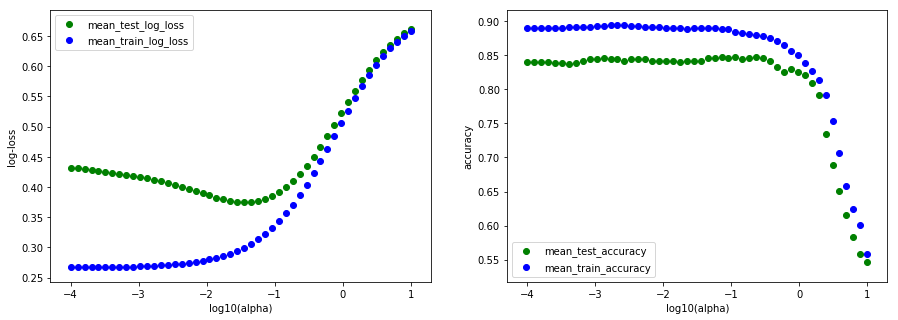

In [22]:
fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax0.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), 
            -gs_log.cv_results_['mean_test_neg_log_loss'], 
            color='green', label='mean_test_log_loss')
ax0.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), 
            -gs_log.cv_results_['mean_train_neg_log_loss'], 
            color='blue', label='mean_train_log_loss')
ax0.set_xlabel('log10(alpha)')
ax0.set_ylabel('log-loss')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels)

ax1.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), gs_log.cv_results_['mean_test_accuracy'], 
            color='green', label='mean_test_accuracy')
ax1.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), gs_log.cv_results_['mean_train_accuracy'], 
            color='blue', label='mean_train_accuracy')
ax1.set_xlabel('log10(alpha)')
ax1.set_ylabel('accuracy')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

In [23]:
print('Наилучшая модель:')
print(gs_log.best_estimator_)
print('Наименьшее среднее значение функции потерь: {:.4}'.format(-gs_log_results.mean_test_neg_log_loss.iloc[0]))
print('Cреднее значение accuracy для наилучшей модели: {:.4}'.format(gs_log_results.mean_test_accuracy.iloc[0]))

Наилучшая модель:
SGDClassifier(alpha=0.035564803062231289, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=100, shuffle=True,
       tol=None, verbose=0, warm_start=False)
Наименьшее среднее значение функции потерь: 0.3774
Cреднее значение accuracy для наилучшей модели: 0.8576


## K-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# K-NN с 10 ближайшими соседями, равными весами
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', n_jobs=4)
knn_clf.fit(X_train_sc, y_train)

print('Accuracy на обучающей выборке: {:.4}'.format(accuracy_score(y_train, knn_clf.predict(X_train_sc))))
print('Accuracy на тестовой выборке: {:.4}'.format(accuracy_score(y_test, knn_clf.predict(X_test_sc))))

Accuracy на обучающей выборке: 0.8534
Accuracy на тестовой выборке: 0.7551


In [25]:
# Проверим его качество на кросс-валидации
predicted = np.array(['']*X_sc.shape[0])
kf = KFold(n_splits=5, random_state=0)

for train_index, test_index in kf.split(X_sc):
    knn_clf.fit(X_sc[train_index,:], y.iloc[train_index])
    predicted[test_index] = knn_clf.predict(X_sc[test_index,:])

print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Accuracy: 0.7504


In [26]:
# Оценим оптимальный набор параметров
parameters = {'n_neighbors': np.arange(1, 50, 1), 'weights': ['uniform', 'distance'], 'algorithm': ['auto']}
gs_knn = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy', n_jobs=4, cv=5)
gs_knn.fit(X_sc, y)
gs_knn_results = pd.DataFrame(gs_knn.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [27]:
gs_knn_results[['mean_test_score', 'param_n_neighbors', 'param_weights']].head(10)

,mean_test_score,param_n_neighbors,param_weights
97,0.813170,49,distance
95,0.813170,48,distance
84,0.808576,43,uniform
82,0.808576,42,uniform
86,0.808576,44,uniform
91,0.807044,46,distance
78,0.807044,40,uniform
73,0.805513,37,distance
76,0.805513,39,uniform
77,0.805513,39,distance


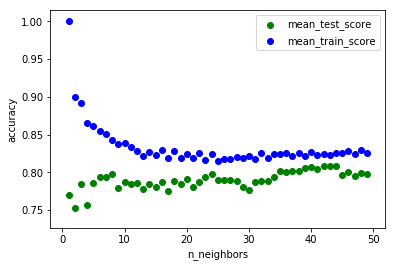

In [28]:
# Посомтрим на зависимость точности классификации при равных весах соседей от числа соседей
uniform_idx = gs_knn_results.param_weights == 'uniform'
plt.scatter(gs_knn_results.param_n_neighbors[uniform_idx], gs_knn_results.mean_test_score[uniform_idx], color='green')
plt.scatter(gs_knn_results.param_n_neighbors[uniform_idx], gs_knn_results.mean_train_score[uniform_idx], color='blue')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

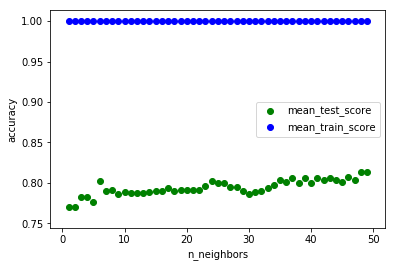

In [29]:
# То же саоме, только когда вес соседа тем меньше, чем дальше он находится
distance_idx = gs_knn_results.param_weights == 'distance'
plt.scatter(gs_knn_results.param_n_neighbors[distance_idx], gs_knn_results.mean_test_score[distance_idx], color='green')
plt.scatter(gs_knn_results.param_n_neighbors[distance_idx], gs_knn_results.mean_train_score[distance_idx], color='blue')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
print('Наилучшая модель:')
print(gs_knn.best_estimator_)
print('Наибольший средний accuracy на тестовых выборках: {}'.format(gs_knn.best_score_))

Наилучшая модель:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='distance')
Наибольший средний accuracy на тестовых выборках: 0.813169984686


##  Наивный Байесовский классификатор

In [31]:
# Наивный Байесовский классификатор с Гауссовскими распределениями p(x_i|y)
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB() # не задаем параметров, т.е. не задаем априиорные вероятности, они будут оцениваться по данным
gnb_clf.fit(X_train_sc, y_train)

print('Accuracy на обучающей выборке: {:.4}'.format(accuracy_score(y_train, gnb_clf.predict(X_train_sc))))
print('Accuracy на тестовой выборке: {:.4}'.format(accuracy_score(y_test, gnb_clf.predict(X_test_sc))))

Accuracy на обучающей выборке: 0.849
Accuracy на тестовой выборке: 0.7755


In [32]:
print('Априорные вероятности классов: {}'.format(gnb_clf.class_prior_))
print('Оцененные средние параметров в каждом классе: {}'.format(gnb_clf.theta_))
print('Оцененные стандартные отклонения параметров в каждом классе: {}'.format(gnb_clf.sigma_))

Априорные вероятности классов: [ 0.44201313  0.55798687]
Оцененные средние параметров в каждом классе: [[ 0.17957267  0.26058656  0.37728223  0.53814601 -0.07897237  0.25106971
  -0.07059262  0.17389614 -0.18089432  0.05911618 -0.18089432 -0.01144586
   0.09633643 -0.06873337  0.06584462 -0.21891446 -0.16369915  0.0151315
  -0.11532401 -0.00776908  0.16347334  0.00869769  0.11913913  0.1974628
  -0.00999691 -0.20461109  0.22487912  0.03759254 -0.01998694 -0.04682929
  -0.04811835  0.06547537  0.84457355  0.52017057  0.04374351  0.
  -0.14070775]
 [-0.14224973 -0.20642543 -0.29886671 -0.42629605  0.0625585  -0.19888659
   0.05592043 -0.13775302  0.14329668 -0.04682929  0.14329668  0.00906691
  -0.07631356  0.05444761 -0.05215927  0.17341459  0.1296754  -0.01198652
   0.09135471  0.00615433 -0.12949653 -0.00688993 -0.09437688 -0.15642151
   0.00791912  0.16208408 -0.17813954 -0.02977918  0.01583279  0.03709614
   0.03811728 -0.05186676 -0.66903473 -0.41205669 -0.03465172  0.
   0.1114626

In [33]:
# Оценим точность на кросс-валидации
predicted = np.array(['']*X_sc.shape[0])
kf = KFold(n_splits=5, random_state=0)

for train_index, test_index in kf.split(X_sc):
    gnb_clf.fit(X_sc[train_index,:], y.iloc[train_index])
    predicted[test_index] = gnb_clf.predict(X_sc[test_index,:])

print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Accuracy: 0.6815


In [34]:
# Оценим, как априорные вероятности влияют на качество предсказаний
parameters = {'priors': [[p, 1-p] for p in np.arange(0.01, 1, 0.01)]}
gs_gnb = GridSearchCV(GaussianNB(), parameters, scoring='accuracy', n_jobs=4, cv=5)
gs_gnb.fit(X_sc, y)

GridSearchCV(cv=5, error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'priors': [[0.01, 0.98999999999999999], [0.02, 0.97999999999999998], [0.029999999999999999, 0.96999999999999997], [0.040000000000000001, 0.95999999999999996], [0.050000000000000003, 0.94999999999999996], [0.060000000000000005, 0.93999999999999995], [0.069999999999999993, 0.93000000000000...0000027], [0.97999999999999998, 0.020000000000000018], [0.98999999999999999, 0.010000000000000009]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

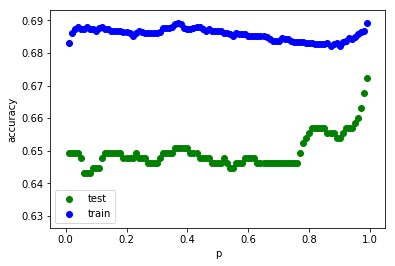

In [35]:
plt.scatter([x[0] for x in gs_gnb.cv_results_['param_priors']], gs_gnb.cv_results_['mean_test_score'], color='green')
plt.scatter([x[0] for x in gs_gnb.cv_results_['param_priors']], gs_gnb.cv_results_['mean_train_score'], color='blue')
plt.legend(['test','train'])
plt.xlabel('p')
plt.ylabel('accuracy')
plt.show()

## SVM

In [36]:
from sklearn.svm import SVC

# Линейный SVM с регуляризацией
svm_clf = SVC(C=1., kernel='linear')
svm_clf.fit(X_train_sc, y_train)

print('Число опорных векторов: {}'.format(svm_clf.n_support_))
print('Индексы опорных векторов:{}'.format(svm_clf.support_))
print('Коэффициенты модели: {}'.format(svm_clf.coef_))
print('\nAccuracy на обучающей выборке: {:.4}'.format(accuracy_score(y_train, svm_clf.predict(X_train_sc))))
print('Accuracy на тестовой выборке: {:.4}'.format(accuracy_score(y_test, svm_clf.predict(X_test_sc))))

Число опорных векторов: [71 61]
Индексы опорных векторов:[ 17  23  27  30  36  41  42  56  61  62  66  72  88 112 133 139 140 144
 150 155 158 163 169 170 180 211 219 223 225 229 232 237 243 244 249 264
 266 270 271 274 284 288 291 293 299 302 305 309 311 315 317 327 328 342
 351 356 370 373 384 386 388 401 409 411 420 426 432 448 450 451 455   1
   6   9  10  12  16  18  26  32  73  74  76  78  83  91 121 126 132 135
 145 147 156 161 165 167 174 188 192 194 196 206 212 238 248 269 275 286
 289 297 298 307 313 322 325 338 344 346 348 361 363 372 377 385 406 412
 417 422 428 439 443 449]
Коэффициенты модели: [[ -8.54106879e-03  -6.66574586e-03  -1.34412520e-01  -4.93633687e-01
    1.00721263e-01  -4.49494914e-01  -9.96043956e-03  -1.49270571e-02
    2.15555994e-02  -6.02236918e-02   2.15555994e-02  -2.44046667e-02
   -4.55565302e-02  -4.01062296e-02  -9.54658386e-02   7.21837803e-01
    1.77635684e-15   2.64694907e-01   2.16683775e-01  -9.65282781e-03
   -3.13743440e-02  -6.95054011e-03

In [37]:
# Поиск потимальных параметров, попробуем разные ядра
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid'], 
              'class_weight': [None, 'balanced'], 'random_state': [0, 10, 100]}
gs_svm = GridSearchCV(SVC(), parameters, scoring='accuracy', n_jobs=4, cv=5)
gs_svm.fit(X_sc, y)
gs_svm_results = pd.DataFrame(gs_svm.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [38]:
gs_svm_results[['mean_test_score', 'param_C', 'param_kernel', 'param_class_weight', 'param_random_state']].head(10)

,mean_test_score,param_C,param_kernel,param_class_weight,param_random_state
35,0.862175,1,sigmoid,balanced,100
34,0.862175,1,sigmoid,balanced,10
33,0.862175,1,sigmoid,balanced,0
25,0.860643,1,sigmoid,None,10
26,0.860643,1,sigmoid,None,100
24,0.860643,1,sigmoid,None,0
17,0.859112,0.1,sigmoid,balanced,100
16,0.859112,0.1,sigmoid,balanced,10
15,0.859112,0.1,sigmoid,balanced,0
10,0.854518,0.1,linear,balanced,10


In [39]:
# Выбор параметра регуляризации
parameters = {'C': np.logspace(-3, 1, num=50, base=10), 'kernel': ['sigmoid'], 'probability': [True]}
gs_svm = GridSearchCV(SVC(), parameters, scoring='accuracy', n_jobs=4, cv=5)
gs_svm.fit(X_sc, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'kernel': ['sigmoid'], 'C': array([  1.00000e-03,   1.20679e-03,   1.45635e-03,   1.75751e-03,
         2.12095e-03,   2.55955e-03,   3.08884e-03,   3.72759e-03,
         4.49843e-03,   5.42868e-03,   6.55129e-03,   7.90604e-03,
         9.54095e-03,   1.15140e-02,   1.38950e-02,   1.676...487e+00,   5.68987e+00,   6.86649e+00,
         8.28643e+00,   1.00000e+01]), 'probability': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

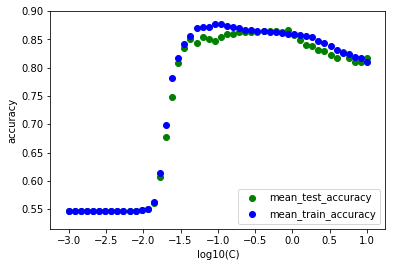

In [40]:
plt.scatter(np.log10(gs_svm.cv_results_['param_C'].astype(np.float64)), 
            gs_svm.cv_results_['mean_test_score'], color='green')
plt.scatter(np.log10(gs_svm.cv_results_['param_C'].astype(np.float64)), 
            gs_svm.cv_results_['mean_train_score'], color='blue')
plt.xlabel('log10(C)')
plt.ylabel('accuracy')
plt.legend(['mean_test_accuracy', 'mean_train_accuracy'])
plt.show()

In [41]:
print('Наилучшая модель:')
print(gs_svm.best_estimator_)
print('Наибольший средний accuracy на тестовых выборках: {}'.format(gs_svm.best_score_))

Наилучшая модель:
SVC(C=0.86851137375135201, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Наибольший средний accuracy на тестовых выборках: 0.866768759571


## Деревья решений

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Построим дерево классификации с параметрами по умолчанию
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train_sc, y_train)

print('Число признаков для выбора разбиения: {}')
print('Accuracy на обучающей выборке: {:.4}'.format(accuracy_score(y_train, dt_clf.predict(X_train_sc))))
print('Accuracy на тестовой выборке: {:.4}'.format(accuracy_score(y_test, dt_clf.predict(X_test_sc))))

Число признаков для выбора разбиения: {}
Accuracy на обучающей выборке: 1.0
Accuracy на тестовой выборке: 0.8265


In [43]:
# Поиск оптимальных параметров
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [5, 10, 20, None],
              'min_samples_split': [2, 20, 50], 'max_features': ['sqrt', 'log2', None], 'random_state': [0], 
              'class_weight': [None, 'balanced']}
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy', n_jobs=4, cv=5)
gs_dt.fit(X_sc, y)
gs_dt_results = pd.DataFrame(gs_dt.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [44]:
gs_dt_results[['mean_test_score', 'param_criterion', 'param_splitter', 'param_max_depth', 'param_min_samples_split', 'param_max_features', 'param_class_weight']].head(10)

,mean_test_score,param_criterion,param_splitter,param_max_depth,param_min_samples_split,param_max_features,param_class_weight
5,0.857580,gini,random,5,50,sqrt,None
77,0.857580,entropy,random,5,50,sqrt,None
221,0.857580,entropy,random,5,50,sqrt,balanced
149,0.856049,gini,random,5,50,sqrt,balanced
158,0.852986,gini,best,5,20,None,balanced
1,0.852986,gini,random,5,2,sqrt,None
239,0.849923,entropy,random,10,50,sqrt,balanced
145,0.848392,gini,random,5,2,sqrt,balanced
257,0.848392,entropy,random,20,50,sqrt,balanced
275,0.848392,entropy,random,None,50,sqrt,balanced


In [45]:
# Уточним максимальную глубину и минимальное число объектов в узле для разбиения
parameters = {'criterion': ['gini'], 'splitter': ['random'], 'max_depth': np.arange(1, 20, 1),
              'min_samples_split': np.arange(2, 50, 1), 'max_features': ['sqrt'], 'random_state': [0]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy', n_jobs=4, cv=5)
gs_dt.fit(X_sc, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'splitter': ['random'], 'max_features': ['sqrt'], 'random_state': [0], 'criterion': ['gini'], 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accura

In [46]:
print('Наилучшая модель:')
print(gs_dt.best_estimator_)
print('Наибольший средний accuracy на тестовых выборках: {}'.format(gs_dt.best_score_))

Наилучшая модель:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=23,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='random')
Наибольший средний accuracy на тестовых выборках: 0.868300153139


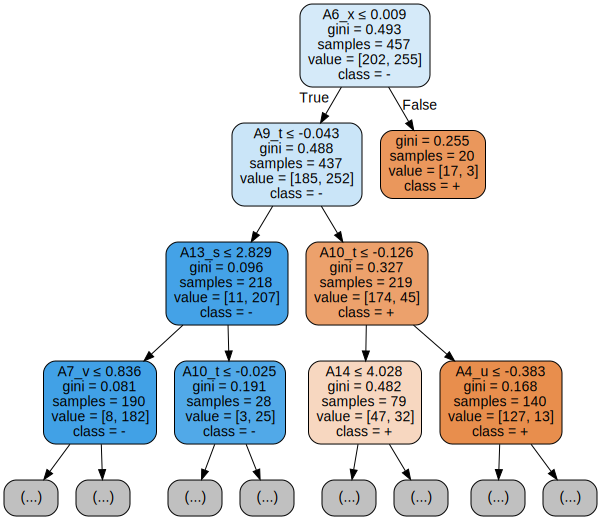

In [47]:
import graphviz
from sklearn import tree

gs_dt.best_estimator_.fit(X_train_sc, y_train)
dot_data = tree.export_graphviz(gs_dt.best_estimator_, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3,
                                )
graph = graphviz.Source(dot_data)  
graph

## Сравнение и оценка

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

# Обучим классификаторы с "лучшими" параметрами на обучающей выборке
gs_log.best_estimator_.fit(X_train_sc, y_train)
gs_knn.best_estimator_.fit(X_train_sc, y_train)
gs_svm.best_estimator_.fit(X_train_sc, y_train)
gs_dt.best_estimator_.fit(X_train_sc, y_train)
gnb_clf.fit(X_train_sc, y_train)

GaussianNB(priors=None)

In [49]:
# Оценим качество предсказаний на тестовой выборке
predictions = {'Logistic Regression': gs_log.best_estimator_.predict(X_test_sc),
               'K-NN': gs_knn.best_estimator_.predict(X_test_sc),
               'SVM': gs_svm.best_estimator_.predict(X_test_sc),
               'Decision Trees': gs_dt.best_estimator_.predict(X_test_sc), 
               'Naive Bayes': gnb_clf.predict(X_test_sc)
              }

print('Accuracy: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(accuracy_score(y_test, predictions[model])))
    
print('Precision: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(precision_score(y_test, predictions[model], pos_label='+')))
    
print('Recall: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(recall_score(y_test, predictions[model], pos_label='+')))
    
print('F1-score: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(f1_score(y_test, predictions[model], pos_label='+')))

Accuracy: 
	Naive Bayes: 0.7755
	SVM: 0.852
	K-NN: 0.801
	Logistic Regression: 0.8469
	Decision Trees: 0.8367
Precision: 
	Naive Bayes: 0.7778
	SVM: 0.7876
	K-NN: 0.8571
	Logistic Regression: 0.8333
	Decision Trees: 0.7768
Recall: 
	Naive Bayes: 0.7447
	SVM: 0.9468
	K-NN: 0.7021
	Logistic Regression: 0.8511
	Decision Trees: 0.9255
F1-score: 
	Naive Bayes: 0.7609
	SVM: 0.8599
	K-NN: 0.7719
	Logistic Regression: 0.8421
	Decision Trees: 0.8447


AUC: 
	Naive Bayes: 0.8495
	SVM: 0.9106
	K-NN: 0.8906
	Logistic Regression: 0.9139
	Decision Trees: 0.873


(0, 1)

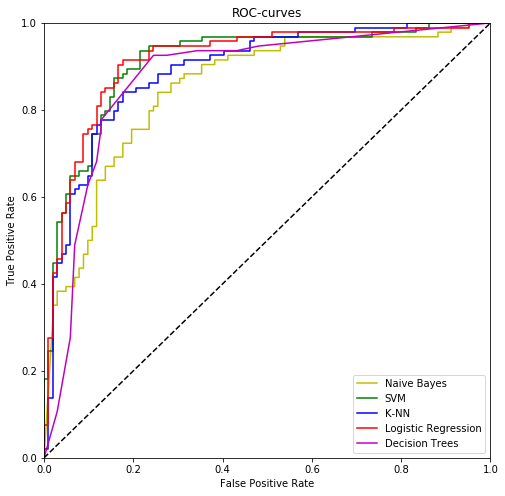

In [50]:
# Возможно, качество классификации может измениться, если изменить пороговое значение вероятности принадлежности классу
probas = {'Logistic Regression': gs_log.best_estimator_.predict_proba(X_test_sc),
          'K-NN': gs_knn.best_estimator_.predict_proba(X_test_sc),
          'SVM': gs_svm.best_estimator_.predict_proba(X_test_sc),
          'Naive Bayes': gnb_clf.predict_proba(X_test_sc),
          'Decision Trees': gs_dt.best_estimator_.predict_proba(X_test_sc)
         }

classes = {'Logistic Regression': gs_log.best_estimator_.classes_ == '+',
           'K-NN': gs_knn.best_estimator_.classes_ == '+',
           'SVM': gs_svm.best_estimator_.classes_ == '+',
           'Naive Bayes': gnb_clf.classes_ == '+',
           'Decision Trees': gs_dt.best_estimator_.classes_ == '+'
          }

markers = {'Logistic Regression': '-r',
           'K-NN': '-b',
           'SVM': '-g',
           'Naive Bayes': '-y',
           'Decision Trees': '-m'
          }

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, title="ROC-curves")
print('AUC: ')
for model in probas:
    print('\t' + model + ': {:.4}'.format(roc_auc_score(y_test == '+', probas[model][:,classes[model]])))
    rc = roc_curve(y_test == '+', probas[model][:,classes[model]])
    ax.plot(rc[0], rc[1], markers[model])

ax.plot([0,1], [0,1], '--k')
ax.legend(probas.keys())
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

### Сравнение вида разделяющих поверхностей

Код для сравнения является модификацией кода примера, представленного в sklearn: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

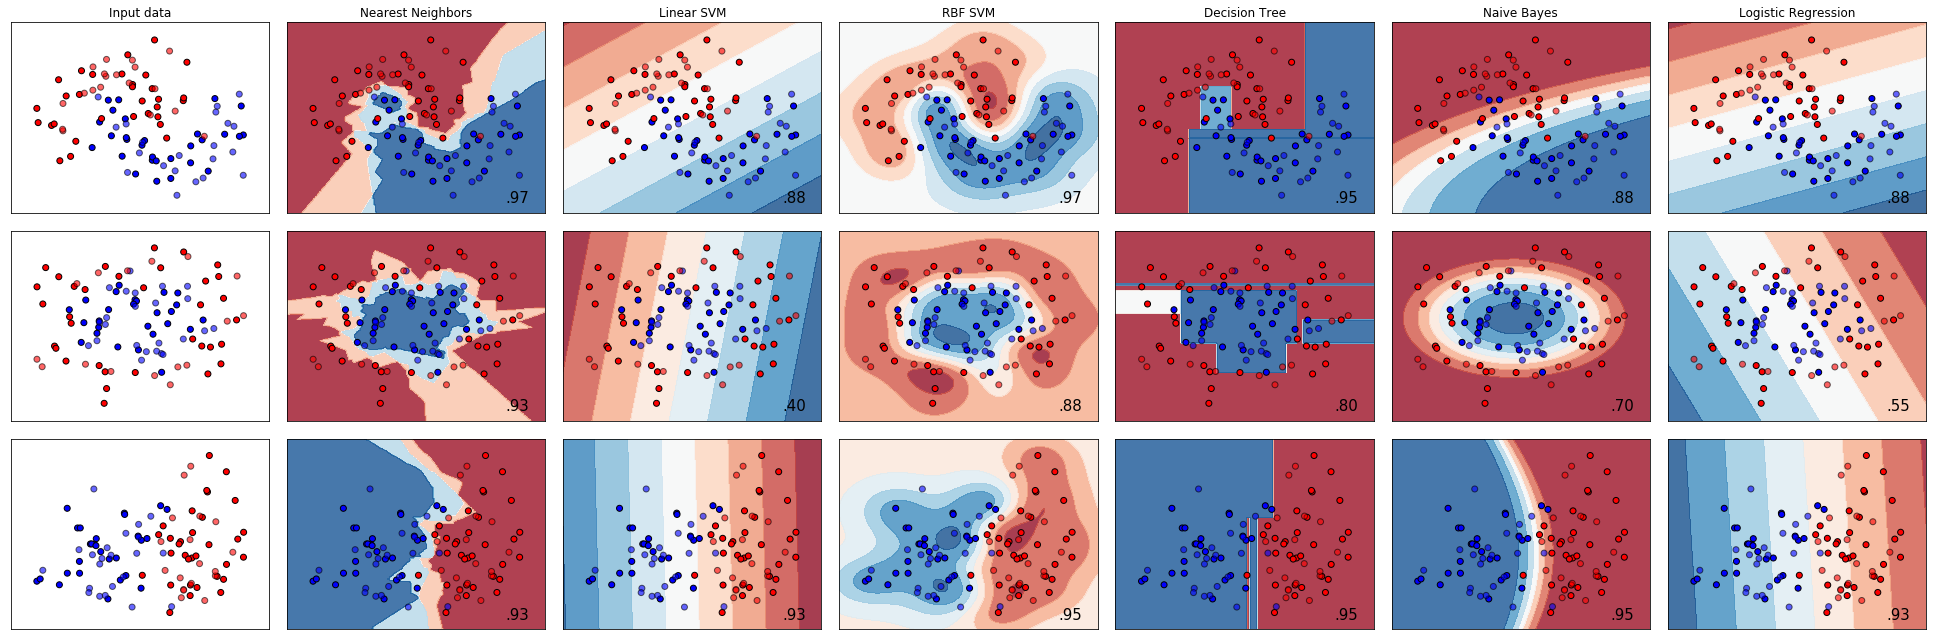

In [51]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap

h = .02  # размер шага на сетке

# Выбранные для сравнения классификаторы
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Naive Bayes", "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    SGDClassifier(loss='log', penalty='l2')]

# Сгенерируем 3 набора данных с двумя признаками
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y) # линейно-разделимые данные с шумом

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# пройдем по всем наборам данных
for ds_cnt, ds in enumerate(datasets):
    # стандартизируем и разделим на обучающую и тестовую выборки
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # изобразим сгенерированные данные
    cm = plt.cm.RdBu # выбираем цветовую палитру
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # нарисуем обучающую выборку
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # и тестовую (более тусклые точки на рисунке)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # пройдем по всем выбранным классийикаторвм
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train) # обучим классификатор
        score = clf.score(X_test, y_test)

        # Нарисуем разделяющую поверхность. Для этого каждой точке на сетке присвоим цвет, 
        # соответствущий вероятности принадлежности классам.
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Также нарисуем точки обучающей выборки
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # и тестовой выборки
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()